In [1]:
import pandas as pd
data_df = pd.read_csv("./data_classification.csv.zip", index_col = ["id"])
data_df

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
19,0,5,1,4,0,0,0,0,0,1,...,4,2,0,9,0,1,0,1,1,1
20,0,2,1,3,1,0,0,1,0,0,...,3,0,0,10,0,1,0,0,1,0
22,0,5,1,4,0,0,1,0,0,0,...,7,1,3,6,1,0,1,0,1,0
26,0,5,1,3,1,0,0,0,1,0,...,4,2,1,5,0,1,0,0,0,1


In [2]:
data_df_0 = data_df.loc[data_df["target"] == 0].sample(data_df["target"].sum())
data_df_1 = data_df.loc[data_df["target"] == 1]

data_sub_df = pd.concat([data_df_0, data_df_1]).sample(frac=1.)
data_sub_df["target"].value_counts(normalize =True)

1    0.5
0    0.5
Name: target, dtype: float64

In [3]:
from sklearn.model_selection import train_test_split

y = data_sub_df["target"]
x = data_sub_df.drop("target", axis = 1)
y_train, y_test, x_train, x_test = train_test_split(y,x, test_size=0.4, random_state=42, stratify=y)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
param_grid = {"n_neighbors": range(1,3),
             "weights": ["uniform", "distance"],
             "p": [1,2]
}
gridsearch = GridSearchCV(knn_clf, param_grid=param_grid, scoring="roc_auc", n_jobs=-1, cv=3, verbose=1)
gridsearch.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 3), 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [5]:
gridsearch.best_params_

{'n_neighbors': 2, 'p': 1, 'weights': 'distance'}

In [7]:
gridsearch.best_score_

0.52746345526216742

In [8]:
from scipy import stats

gbm_clf = GradientBoostingClassifier()

param_distribution = {
    "learning_rate" : stats.uniform(0.0001, 0.5),
    'n_estimators': stats.randint(100,500),
    "max_depth":stats.randint(2,20),
    "min_samples_split" : stats.uniform(0, 0.5),
    "min_samples_leaf": stats.uniform(0, 0.5),
    "min_weight_fraction_leaf" : stats.uniform(0, 0.5),
    "subsample": stats.uniform(0.2, 0.8),
    "max_leaf_nodes":stats.randint(4, 100)
}

gridsearch = RandomizedSearchCV(gbm_clf, param_distributions=param_distribution, scoring="roc_auc", n_jobs=-1, cv=3,n_iter=10, verbose=1)
gridsearch.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   48.2s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x117e1ffd0>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x117e1fe48>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10939a4e0>, 'min_samples_split': <scip...0x117e25f98>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x117e25e80>},
          pre_dispatch='2*n_jo

In [9]:
gridsearch.best_params_

{'learning_rate': 0.2447094728556613,
 'max_depth': 11,
 'max_leaf_nodes': 58,
 'min_samples_leaf': 0.037657327241064076,
 'min_samples_split': 0.36925257563320635,
 'min_weight_fraction_leaf': 0.11563883027810334,
 'n_estimators': 205,
 'subsample': 0.84096361890702132}

In [10]:
gridsearch.best_score_

0.6157172554734055

In [11]:
gbm_clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [ ]:
%matplotlib inline
var_imp = pd.DataFrame({"Importance": gbm_clf.feature_importances_}, index=x_train.columns)
var_imp.sort_values("Importance").iloc[-20:].plot(kind="barh")

# Unsupervised Learning/Clustering
## K-mean clustering

In [14]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=2000,centers=3, cluster_std=[1,2,5,0.5])
print(X,y)


[[  3.52694972  -8.57330337]
 [ 10.48174831  10.1536503 ]
 [ -7.86283879   3.49545795]
 ..., 
 [  6.90303828   9.24813803]
 [  4.64047457  -7.23735262]
 [  4.40686187  -8.64341812]] [0 1 2 ..., 1 0 0]


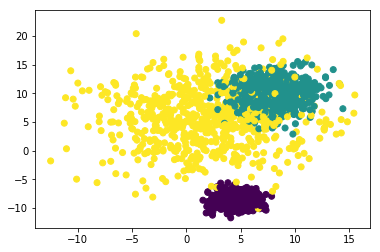

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

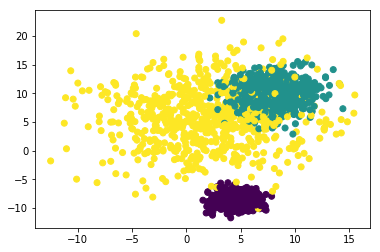

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,n_jobs=-1)
y_predicted= kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y)

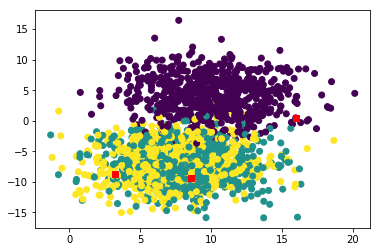

In [32]:
from sklearn.utils import shuffle

X,y = shuffle(X,y)
init = X[0:3 ,:]

plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(init[:,0],init[:,1],c="red",marker="s")

/Users/macbookproi7/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


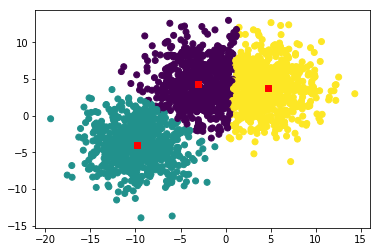

In [37]:
kmeans = KMeans(n_clusters=3,n_jobs=-1, init=init, max_iter=10)
kmeans.fit(X)
init = kmeans.cluster_centers_
y_predicted= kmeans.fit_predict(X)


plt.scatter(X[:,0],X[:,1],c=y_predicted)
plt.scatter(init[:,0],init[:,1],c="red",marker="s")

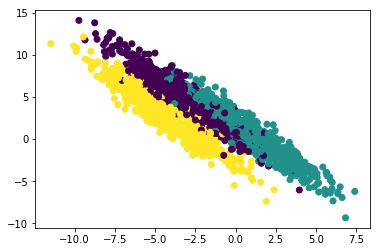

In [35]:
import numpy as np
X,y = make_blobs(n_samples=2000,centers=3,cluster_std=[3,3,3])
transformation = [[0.6,-0.6],[-0.4,0.8]]

X_aniso = np.dot(X,transformation)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y)

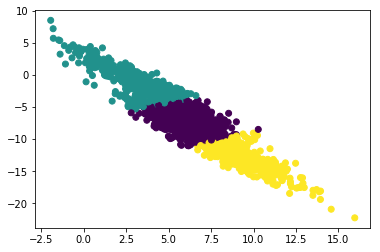

In [30]:
kmeans = KMeans(n_clusters=3,n_jobs=-1,)

y_predicted = kmeans.fit_predict(X_aniso)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y_predicted)

# The Expectation- Maximization algorithm 

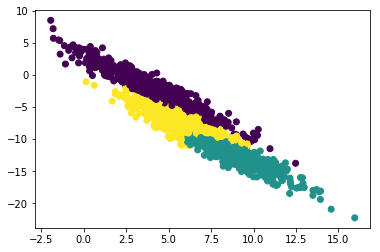

In [31]:
from sklearn.mixture import GaussianMixture

em = GaussianMixture(n_components=3)
em.fit(X_aniso)
y_predicted=em.predict(X_aniso)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y_predicted)

# Principal component analysis (PCA)

$\bar{x} = x_{1}\bar{P}C_{1}+X_{2}\bar{P}C_{2} \approx X_{1}\bar{P}C_{1}$

$x =
            \begin{bmatrix}
                1 & x_{11} & x_{12} & x_{13} & \dots  & x_{1M} \\
                1 & x_{21} & x_{22} & x_{23} & \dots  & x_{2M} \\
                \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
                1 & x_{N1} & x_{N2} & x_{N3} & \dots  & x_{NM}
            \end{bmatrix},
            y =
            \begin{bmatrix}
                y_{1}\\
                y_{2} \\
                \vdots \\
                y_{N}
            \end{bmatrix},
            \beta =
            \begin{bmatrix}
                \beta_{0}\\
                \beta_{1} \\
                \vdots \\
                \beta_{N}
            \end{bmatrix}
$

$ X' = X'^{T}-\mu $

$Cov[X} = X'^{T}X' $

$X'^{T}X = W \Lambda W^{T} $



The trace of a matrix is invariant

$\Lambda = W^{T}X'^{T}X W$

$Tr(\Lambda) = \lambda_1 +\lambda_2 +\lambda_3$






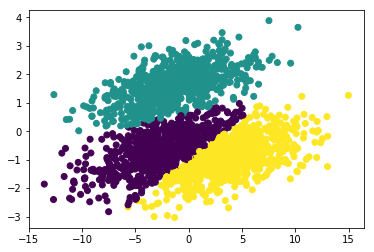

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_aniso)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_predicted)

In [41]:
pca.explained_variance_

array([ 20.56693393,   1.76021902])

In [42]:
pca.explained_variance_ratio_

array([ 0.92116241,  0.07883759])

In [52]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(x_train)

In [53]:
x_train.shape
X_pca.shape

(26032, 4)

In [54]:
pca.explained_variance_ratio_


array([ 0.9072281 ,  0.02532125,  0.01082066,  0.00689058])

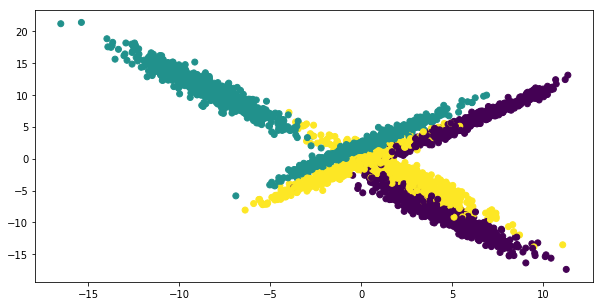

In [55]:
import numpy as np
X,y = make_blobs(n_samples=2000,centers=3,cluster_std=[3,3,3])
transformation1 = [[0.6,-0.6],[-0.4,0.8]]
transformation2 = [[-0.4,-0.6],[-0.6,-0.6]]
X_aniso1 = np.dot(X,transformation1)
X_aniso2 = np.dot(X,transformation2)



x_full = np.concatenate((X_aniso1,X_aniso2),0)
y_full = np.concatenate((y,y),0)
plt.figure(figsize=(10,5))
plt.scatter(x_full[:,0],x_full[:,1],c=y_full)


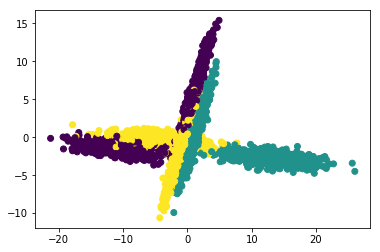

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(x_full)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_full)

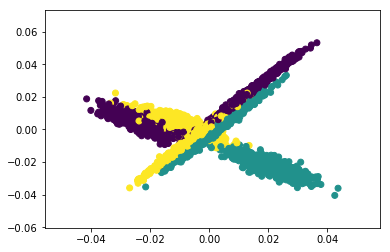

In [59]:
from sklearn.decomposition import FastICA

pca = FastICA(n_components = 2)
X_pca = pca.fit_transform(x_full)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_full)